我们已经介绍了包括线性回归和softmax回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

### 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。
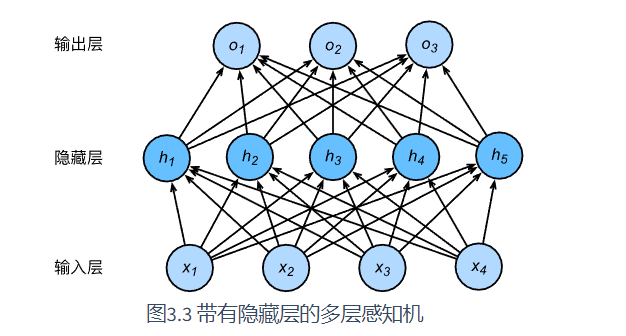

在图3.3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

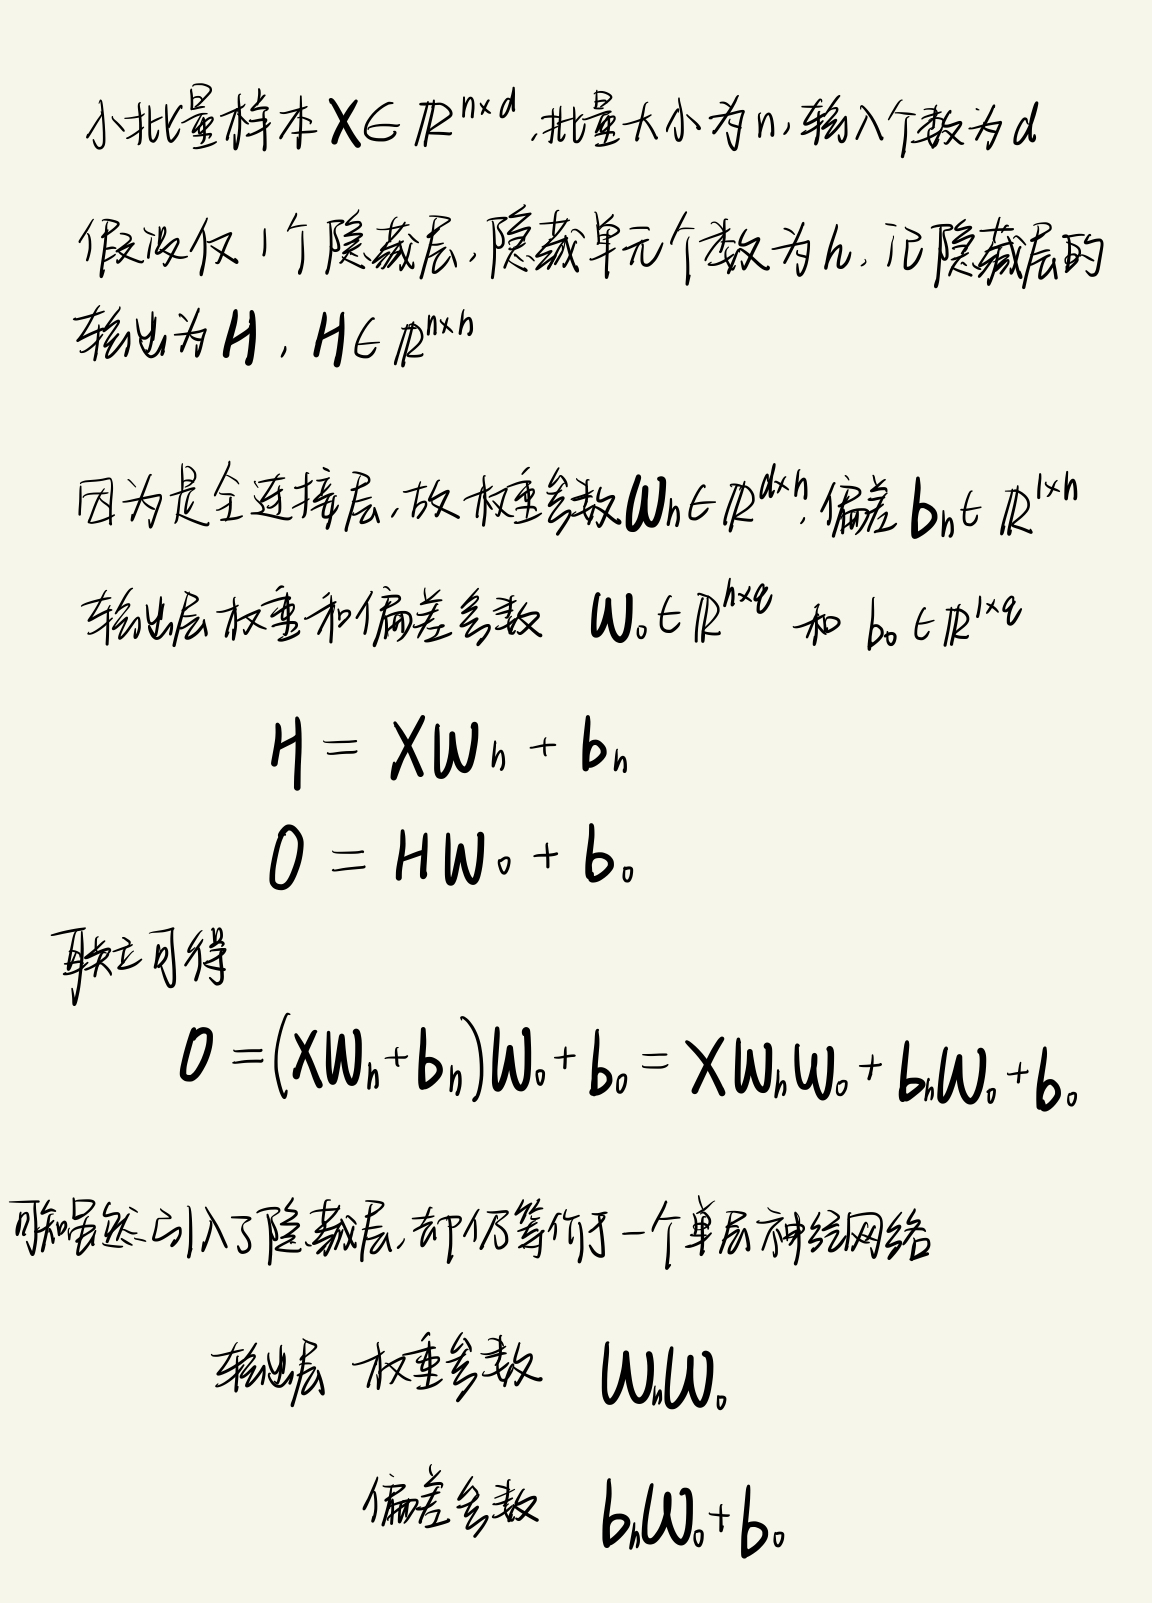

### 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

#### ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素，该函数定义为`ReLU(x)=max(x,0)`
可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数`xyplot`。

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt

def xyplot(x_vals,y_vals,name):
    plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name+'y')

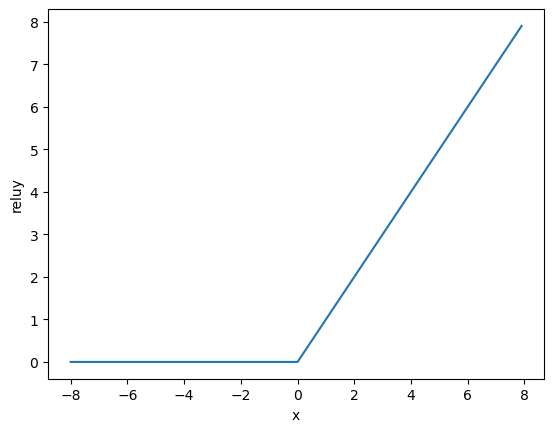

In [10]:
x = torch.arange(-8.,8.,0.1,requires_grad=True)
y = x.relu()
xyplot(x,y,'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

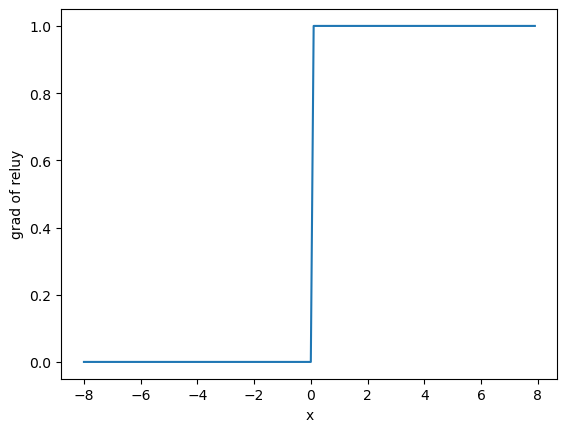

In [11]:
y.sum().backward()
xyplot(x,x.grad,'grad of relu')

#### sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：
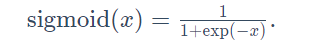
sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

依据链式法则，sigmoid函数的导数
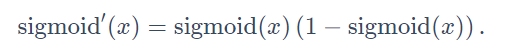

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

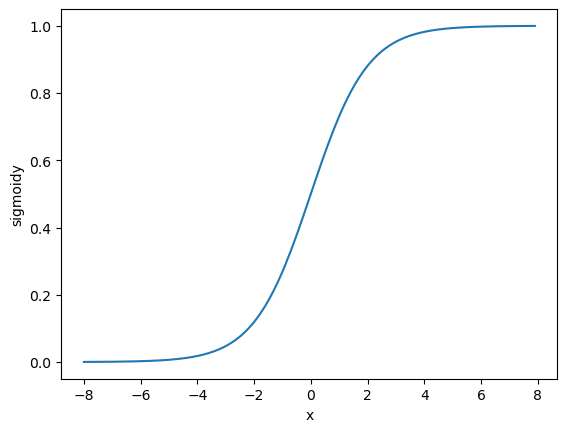

In [13]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

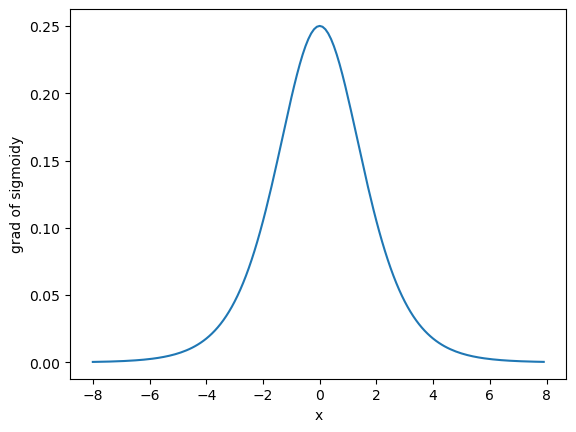

In [14]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

### tanh函数
```
www
```